In [ ]:
# 📥 Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from sklearn.model_selection import ParameterGrid
from itertools import product

In [2]:
sys.path.append(os.path.abspath(".."))

In [17]:
from src.search import grid_search_mlp_parallel

In [18]:
ruta_csv = "../data/processed/series_hourly.csv"
df = pd.read_csv(ruta_csv, parse_dates=["Datetime"], index_col="Datetime")
print(df.head())

                          R1      R2      R3      R4     R5      R6
Datetime                                                           
2020-08-24 00:00:00  195.422  21.033  23.986  17.069  5.788  18.110
2020-08-24 01:00:00  164.393  16.177  21.957  13.287  4.094  16.437
2020-08-24 02:00:00  146.456  14.391  25.695  11.237  5.851   3.126
2020-08-24 03:00:00  139.325  14.278  26.725  12.247  5.688   2.762
2020-08-24 04:00:00  128.718   9.675  21.466  14.500  4.934   2.438


In [19]:
series = df[["R1"]].values

In [20]:
test_size = int(len(series) * 0.10)  # 10% de test
print(f"Tamaño total: {len(series)} | Test size: {test_size}")

Tamaño total: 1752 | Test size: 175


In [21]:
def get_neurons(num_capas, valores=[50, 100, 150]):
    return [list(c) for c in product(valores, repeat=num_capas)]

In [22]:
param_grid = {
    'steps_in': [3, 5, 7, 14, 30],
    'steps_out': [3],
    'n_neurons': get_neurons(1) + get_neurons(2),
    'n_epochs': [500, 1000, 1500],
    'n_batch': [16, 32, 64],
    'activation': ['relu'],
    'loss': ['mse']
}

In [14]:
test_size = int(np.round(len(series)*0.10))


In [ ]:
mejor_config, mejor_score = grid_search_mlp_parallel(
    series,
    test_size,
    param_grid,
    carpeta_modelos="../results/models/univariate/mlp",
    nombre_csv="../results/metrics/univariate/mlp/resultados_gridsearch.csv",
    n_jobs=12
)

c:\Users\Usuario\anaconda3\envs\widgets\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



🟢 Mejor configuración encontrada:
{'activation': 'relu', 'loss': 'mse', 'n_batch': 16, 'n_epochs': 1000, 'n_neurons': [150, 150], 'steps_in': 30, 'steps_out': 3, 'modelo': '../results/models/modelo_119_RMSE_7.1604.keras', 'RMSE_global': 7.160442875333949, 'RMSE_t+1': 5.459010155916863, 'RMSE_t+2': 7.461431575109482, 'RMSE_t+3': 8.266926483301882}
✅ Modelo guardado como: ../results/models/mejor_modelo.keras


In [25]:
print("\nRMSE global del mejor modelo:", mejor_score)
print("Mejor configuración encontrada:", mejor_config)


RMSE global del mejor modelo: 7.160442875333949
Mejor configuración encontrada: {'activation': 'relu', 'loss': 'mse', 'n_batch': 16, 'n_epochs': 1000, 'n_neurons': [150, 150], 'steps_in': 30, 'steps_out': 3, 'modelo': '../results/models/modelo_119_RMSE_7.1604.keras', 'RMSE_global': 7.160442875333949, 'RMSE_t+1': 5.459010155916863, 'RMSE_t+2': 7.461431575109482, 'RMSE_t+3': 8.266926483301882}


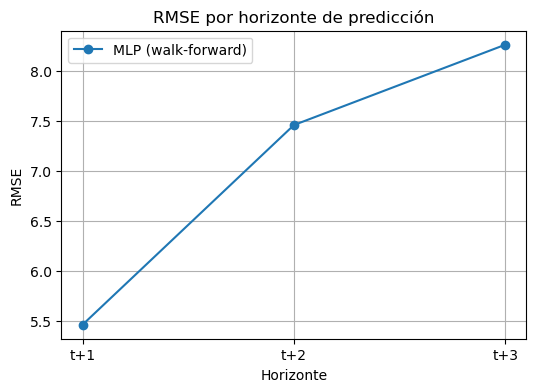

In [26]:
time_labels = [f"t+{i+1}" for i in range(mejor_config["steps_out"])]

rmse_steps = [mejor_config[f"RMSE_t+{i+1}"] for i in range(mejor_config["steps_out"])]

plt.figure(figsize=(6,4))
plt.plot(time_labels, rmse_steps, marker="o", label="MLP (walk-forward)")
plt.title("RMSE por horizonte de predicción")
plt.xlabel("Horizonte")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.show()